In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from keras.preprocessing.image import load_img

Using TensorFlow backend.


In [2]:
os.getcwd()

'/Users/wigasper/Documents/Python/English Practice'

In [3]:
#images_df = {'ID': [1, 2]}
#images_df["images"] = [np.array(load_img("./RGALI Documents/1.tif"))]

In [1]:
image = load_img("../Data/RGALI Documents/1.tif", grayscale = False, color_mode = 'rgb', target_size = None)

NameError: name 'load_img' is not defined

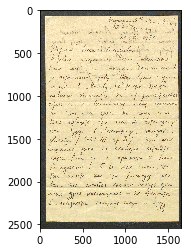

Image size: (1648, 2540) pixels


In [5]:
# can also use imageObject.show() (non static)
plt.imshow(image)
plt.show()

# image size in pixels
print("Image size: " + repr(image.size) + " pixels")

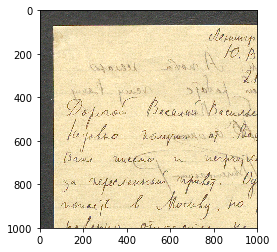

Image size: (1000, 1000) pixels


In [6]:
# let's crop this mof
# imageObject.crop(x1, y1, x2, y2) w/ top left at (0,0)
croppedImage = image.crop(box=(0, 0, 1000, 1000))

# show cropped image
plt.imshow(croppedImage)
plt.show()

# image size in pixels
print("Image size: " + repr(croppedImage.size) + " pixels")

In [13]:
# here we have some working shit. let's just bypass this and test the 
# recursive cropper. Preserving for historic record

# segments = 4
# xOffset = image.width / segments
# yOffset = image.height / segments
# count = 0
# y = 0 - yOffset
    
# for i in range(0, segments):   
#     y += yOffset
#     x = 0

#     for j in range(0, segments):
#         plt.imsave("./crops/{}.jpg".format(count), np.array(image.crop(box=(x, y, x + xOffset, y + yOffset))))
#         x += xOffset
#         count += 1


In [16]:
def recursiveCropper(imageIn, segmentsIn, countIn):
    
    # Arguments
    #    imageIn: The original image to be successively cropped
    #        into smaller and smaller pieces.
    #    segmentsIn: The number of segments each side will be 
    #        divided into. Specified initially and then reduced
    #        with each recursive call.
    #    countIn: The accumulator for image file labels. Should
    #        initially be zero, increased with every crop and passed
    #        with each recursive call.

    returnVal = False
    segments = segmentsIn
    image = imageIn
    count = countIn
    
    xOffset = image.width / segments
    yOffset = image.height / segments
    y = 0 - yOffset
    
    if (xOffset <= 40):
        returnVal = True;
    else:
        for i in range(0, segments):   
            y += yOffset
            x = 0
            for j in range(0, segments):
                plt.imsave("./crops/{}.jpg".format(count), np.array(image.crop(box=(x, y, x + xOffset, y + yOffset))))
                x += xOffset
                count += 1
                
        return recursiveCropper(image, segments * 2, count)
    
    return returnVal

In [17]:
if recursiveCropper(image, 4, 0):
    print("Great success")
else:
    print("terrible humiliation")

great success
